# Hough Transform Basics

The Hough Transform is a popular technique to detect any shape, if you can represent that shape in a mathematica form. It can detect the shape even if it is broken or distorted a little bit.

A line in the image space can be expressed with two variables. For example:
- In the Cartesian Coordinate System: $$y_{i} = mx_{i}+c$$
- In the Polar Coordinate System: $$xcos \theta + ysin \theta = r$$

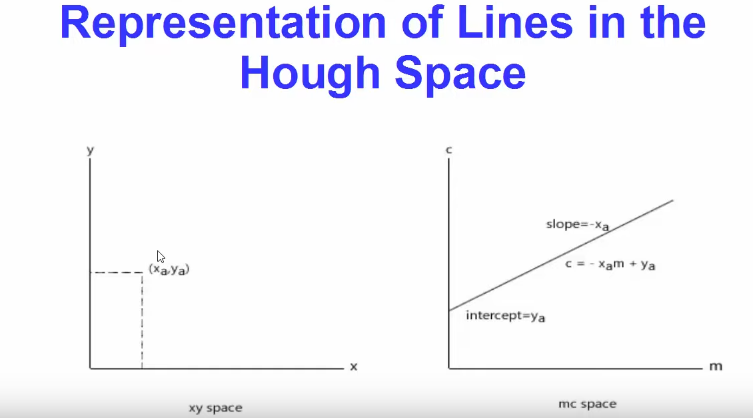

Representing the slope as the x-axis and intercept as the y-axis, we get the Hough Space

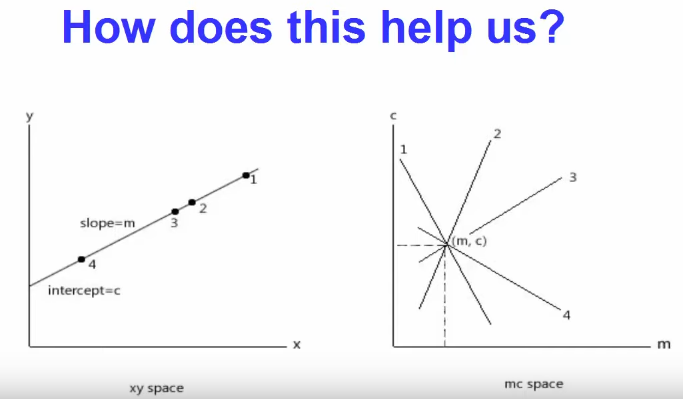

Helps convert the points in the xy-space to lines in the mc-space also called the Hough Space.

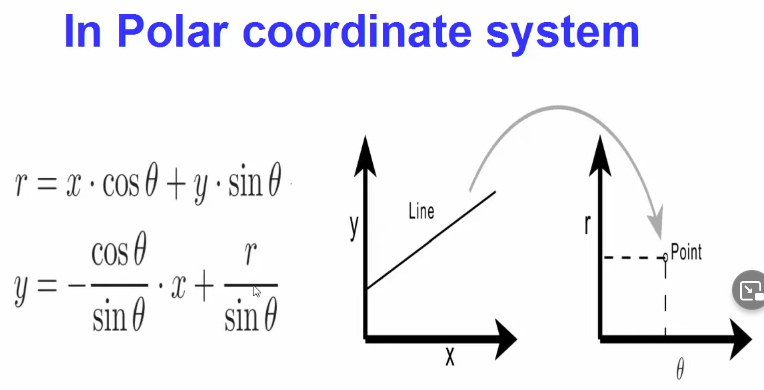

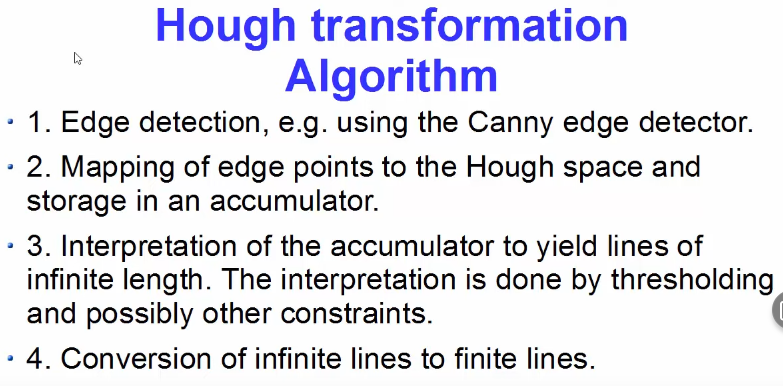

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(os.getcwd(), 'data\sudoku.png')
path

'E:\\PycharmProjects\\Practice Python\\OpenCv\\OpenCV Tutorials for Begineers\\data\\sudoku.png'

In [3]:
import numpy as np

In [4]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,150,apertureSize=3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

In [7]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    #x1 stores the rounded off value of (r*cos*(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    
    #y1 stores the rounded off value of (r*sin(theta)+1000*cos(theta))
    y1 = int(y0 + 1000 * (a))
    
    
    #x2 stores the rounded off value of (r*cos*(theta) + 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    
    #y1 stores the rounded off value of (r*sin(theta)-1000*cos(theta))
    y2 = int(y0 - 1000 * (a))
    
    cv2.line(img, (x1,y1), (x2,y2),(0,0,255),2)
    
cv2.imshow('Image', img)
cv2.imshow('Canny Edge', edges)
if cv2.waitKey(0) & 0xFF==ord('q'):
    cv2.destroyAllWindows()

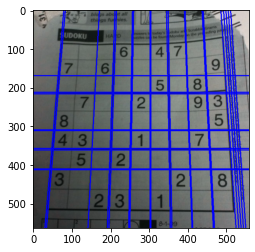

In [8]:
plt.imshow(img)

Here, we can see that the line exceeds than the actual present line. This problem can be solved using the HoughLinesP method which is the HoughLine Probabilistic method.
 

### Using HoughLinesP

In [12]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,150,apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180,100, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
    
cv2.imshow('image', img)
cv2.imshow('Canny Edge', edges)
if cv2.waitKey(0) & 0xFF==ord('q'):
    cv2.destroyAllWindows()

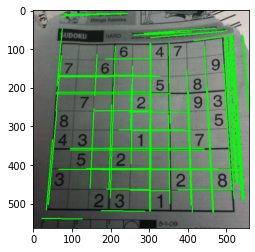

In [13]:
plt.imshow(img)